<a href="https://colab.research.google.com/github/pharringtonp19/econometrics/blob/main/notebooks/probability_and_statistics/Kernel_Density_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture 
!pip install oryx

In [54]:
import jax 
import jax.numpy as jnp 
import oryx 
from oryx.core.ppl import random_variable
from tensorflow_probability.substrates import jax as tfp
tfd = tfp.distributions
from functools import partial 
import matplotlib.pyplot as plt
import math 

In [4]:
def X(key):
  return random_variable(tfd.Normal(0., 1.))(key)

CDF = oryx.bijectors.NormalCDF(validate_args=False, name='normal')

In [ ]:
def ecdf(keys, x):
  xs = jax.vmap(X)(keys)
  ys = jax.vmap(lambda z: jnp.where(z<=x, 1.0, 0.))(xs)
  return jnp.mean(ys)

In [77]:
def k_dens1(h, keys, x):
  a = ecdf(keys, x + h)
  b = ecdf(keys, x -h)
  return (a - b)/2*h

def k_dens2(h, keys, x):
  xs = jax.vmap(X)(keys)
  ys = jax.vmap(lambda z: jnp.where( (z>=x-h) & (z<= x+h), 1.0, 0.))(xs)
  return jnp.mean(ys)/(2*h)

def k_dens3(h, k, keys, x):
  xs = jax.vmap(X)(keys)
  normalized = (xs - x)/h
  return jnp.mean(jax.vmap(k)(normalized
                              ))/h

In [78]:
def rectangular_kernel(u):
  return 1/2*(jnp.abs(u)<=1.)

def gaussian_kernel(u):
  return 1/jnp.sqrt(2*math.pi)*jnp.exp(-u**2/2)

def epanechnikov_kernel(u):
  return 3/4*(1-u**2)*(jnp.abs(u)<=1)

In [79]:
def sup_div(keys):
  xs = jnp.linspace(-3., 3., 100)
  f = partial(ecdf, keys)
  vs = jax.vmap(f)(xs)
  diff = vs - jax.vmap(CDF)(xs)
  return max(diff)

In [80]:
n_rvs = 100 
init_key = jax.random.PRNGKey(1)
keys = jax.random.split(init_key, n_rvs)

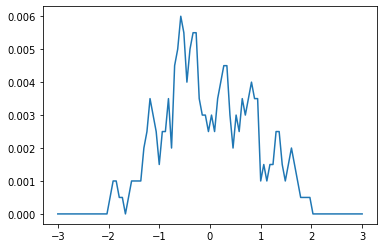

In [81]:
h = 0.1
xs = jnp.linspace(-3., 3., 100)
f = partial(k_dens1, h, keys)
ys = jax.vmap(f)(xs)
plt.plot(xs, ys)
plt.show()

### **Kernel Density Estimator**

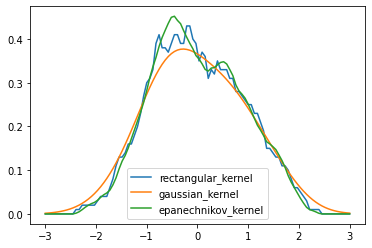

In [83]:
h = 0.5
xs = jnp.linspace(-3., 3., 100)
f = partial(k_dens3, h, rectangular_kernel, keys)
ys = jax.vmap(f)(xs)
plt.plot(xs, ys, label='rectangular_kernel')
f = partial(k_dens3, h, gaussian_kernel, keys)
ys = jax.vmap(f)(xs)
plt.plot(xs, ys, label='gaussian_kernel')
f = partial(k_dens3, h, epanechnikov_kernel, keys)
ys = jax.vmap(f)(xs)
plt.plot(xs, ys, label='epanechnikov_kernel')
plt.legend()
plt.show()